In [21]:
import os
import mido
import numpy as np
import StyleNet.midi_util as midi_util
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

###  Part 1 Loading and processing data

In this part we load and process the midi files.



In [4]:
fpath = "TPD/classical/bach_846_format0.mid"
midi = mido.MidiFile(fpath)
midi_array, velocity_array = midi_util.midi_to_array_one_hot(midi, 4)

In [5]:
print "midi_array shape = %s" % str(midi_array.shape)
print "velocity_array shape = %s" % str(velocity_array.shape)

midi_array shape = (512, 176)
velocity_array shape = (512, 88)


In [6]:
midi_notes = midi_array[:, ::2]
midi_continuation = midi_array[:, 1::2]
X = np.dstack((midi_notes, midi_continuation))


print "X shape = %s" % str(X.shape)

X shape = (512, 88, 2)


In [65]:
def load_midis(base_fpath):
    fpaths = []
    iter = 0
    for (root, dirnames, filenames) in os.walk(base_fpath):
        fpaths += [os.path.join(root, filename) for filename in filenames]
    return [mido.MidiFile(fpath) for fpath in fpaths]

def convert_midis(midis):
    X = []
    Y = []
    iter = 0
    for midi in midis:
        try:
            midi_array, velocity_array = midi_util.midi_to_array_one_hot(midi, 4)
            print "midi_array shape = %s" % str(midi_array.shape)
        except:
            continue
            
        velocity_array = velocity_array.reshape(velocity_array.shape[0],velocity_array.shape[1], 1)
        midi_notes = midi_array[:, ::2]
        midi_continuation = midi_array[:, 1::2]
        X_i = np.dstack((midi_notes, midi_continuation))
        X += [X_i]
        Y += [velocity_array]
    return np.stack(X), np.stack(Y)

In [36]:
midis = load_midis("TPD/classical")

KeyboardInterrupt: 

In [114]:
%%capture
X, Y = convert_midis(midis)

In [120]:
print(X.shape)
print(Y.shape)
train_percent = 0.8
total = X.shape[0]
train_index = int(total * train_percent)

X_train, Y_train = X[:train_index,:], Y[:train_index, :]
X_test, Y_test = X[train_index:, :], Y[train_index:, :]

(183, 512, 88, 2)
(183, 512, 88, 1)


In [121]:
print('size of X_train is ' + str(X_train.shape))
print('size of Y_train is ' + str(Y_train.shape))

print('size of X_test is ' + str(X_test.shape))
print('size of Y_test is ' + str(Y_test.shape))


size of X_train is (146, 512, 88, 2)
size of Y_train is (146, 512, 88, 1)
size of X_test is (37, 512, 88, 2)
size of Y_test is (37, 512, 88, 1)


In [122]:
def model(input_shape):
    X_input = Input(input_shape)
    X = Conv2D(filters=50, kernel_size=(3, 3), strides=(1, 1), padding='same', name='Conv0')(X_input)
    X = Activation('relu')(X)
    
    X = keras.layers.Conv2D(filters=1, kernel_size=(3, 3), strides=(1, 1), padding='same', name='Conv1')(X_input)
    model = Model(inputs=X_input, outputs=X, name='basic')
    return model

In [123]:
test_model = model((512, 88, 2))
test_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [125]:
history = test_model.fit(X_train, Y_train, batch_size = 1, epochs = 150)

Epoch 1/150
146/146 [==============================] - 2s 14ms/step - loss: 123.4958 - acc: 0.8681
Epoch 2/150
146/146 [==============================] - 2s 14ms/step - loss: 121.5346 - acc: 0.3728
Epoch 3/150
146/146 [==============================] - 2s 13ms/step - loss: 119.6830 - acc: 1.5202e-07
Epoch 4/150
146/146 [==============================] - 2s 14ms/step - loss: 117.9102 - acc: 1.2161e-06
Epoch 5/150
146/146 [==============================] - 3s 18ms/step - loss: 116.2066 - acc: 2.2803e-06
Epoch 6/150
146/146 [==============================] - 2s 14ms/step - loss: 114.5684 - acc: 2.7363e-06
Epoch 7/150
146/146 [==============================] - 2s 12ms/step - loss: 112.9873 - acc: 4.1045e-06
Epoch 8/150
146/146 [==============================] - 3s 17ms/step - loss: 111.4503 - acc: 8.6650e-06
Epoch 9/150
146/146 [==============================] - 2s 13ms/step - loss: 109.9604 - acc: 8.8170e-06
Epoch 10/150
146/146 [==============================] - 2s 17ms/step - loss: 108.

146/146 [==============================] - 2s 11ms/step - loss: 44.4375 - acc: 0.0292
Epoch 82/150
146/146 [==============================] - 2s 12ms/step - loss: 43.9329 - acc: 0.0292
Epoch 83/150
146/146 [==============================] - 2s 12ms/step - loss: 43.4372 - acc: 0.0293
Epoch 84/150
146/146 [==============================] - 2s 14ms/step - loss: 42.9497 - acc: 0.0295
Epoch 85/150
146/146 [==============================] - 2s 13ms/step - loss: 42.4719 - acc: 0.0295
Epoch 86/150
146/146 [==============================] - 2s 16ms/step - loss: 42.0009 - acc: 0.0295
Epoch 87/150
146/146 [==============================] - 2s 12ms/step - loss: 41.5386 - acc: 0.0295
Epoch 88/150
146/146 [==============================] - 2s 12ms/step - loss: 41.0868 - acc: 0.0295
Epoch 89/150
146/146 [==============================] - 2s 15ms/step - loss: 40.6459 - acc: 0.0295
Epoch 90/150
146/146 [==============================] - 2s 12ms/step - loss: 40.2107 - acc: 0.0290
Epoch 91/150
146/146 [=

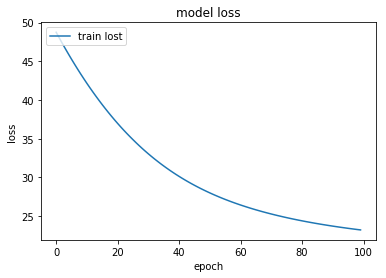

In [82]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train lost'], loc='upper left')
plt.show()